In [1]:
import pandas as pd 

In [3]:
data= pd.read_csv("merged_data.csv")

C:\Users\mitra\AppData\Local\Temp\ipykernel_25700\4031505531.py:1: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("merged_data.csv")


In [9]:
data.head()

,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod,diedWithin30days,died_in_30days,exact_day_of_death,last_known_alive,follow_up_days,age_group,race_standard,chiefcomplaint_cleaned,snomed_codes,snomed_primary
0,10000032,2180-05-06 19:17:00,F,WHITE,Hypotension,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,['hypotension'],['45007003'],45007003
1,10000032,2180-05-06 19:17:00,F,WHITE,"Abd pain, Abdominal distention",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['abd pain', 'abd distention']","['21522001', '609624008']",21522001
2,10000032,2180-05-06 19:17:00,F,WHITE,"n/v/d, Abd pain",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['n/v/d', 'abd pain']","['16932000+62315008', '21522001']",16932000+62315008
3,10000032,2180-05-06 19:17:00,F,WHITE,Abdominal distention,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,['abd distention'],['609624008'],609624008
4,10000032,2180-05-06 19:17:00,F,WHITE,"Abdominal distention, Abd pain, LETHAGIC",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['abd distention', 'abd pain', 'ethagic']","['609624008', '21522001']",609624008


In [11]:
import ast
data['snomed_codes'] = data['snomed_codes'].apply(ast.literal_eval)


In [12]:
# Basic shape and info
print(data.shape)
print(data.info())
print(data.describe(include="all"))

# Check for missing values
print(data.isnull().sum())


(3297455, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297455 entries, 0 to 3297454
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   subject_id              int64  
 1   intime                  object 
 2   gender                  object 
 3   race                    object 
 4   chiefcomplaint          object 
 5   anchor_age              float64
 6   dod                     object 
 7   diedWithin30days        bool   
 8   died_in_30days          int64  
 9   exact_day_of_death      float64
 10  last_known_alive        object 
 11  follow_up_days          int64  
 12  age_group               object 
 13  race_standard           object 
 14  chiefcomplaint_cleaned  object 
 15  snomed_codes            object 
 16  snomed_primary          object 
dtypes: bool(1), float64(2), int64(3), object(11)
memory usage: 405.7+ MB
None
          subject_id               intime   gender     race chiefcomplaint  \
count   3.297

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load your data
data = pd.read_csv("merged_data.csv")

# Set better visualization styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")

# Display basic info as you did before
print(f"Dataset shape: {data.shape}")
print("\nMissing values:")
print(data.isnull().sum())

Dataset shape: (3297455, 17)

Missing values:
subject_id                      0
intime                          0
gender                          0
race                            0
chiefcomplaint                  0
anchor_age                      0
dod                       2298246
diedWithin30days                0
died_in_30days                  0
exact_day_of_death              0
last_known_alive                0
follow_up_days                  0
age_group                       0
race_standard                   0
chiefcomplaint_cleaned          0
snomed_codes                    0
snomed_primary             893300
dtype: int64



--- Gender Distribution Analysis ---
gender
M    1720544
F    1576911
Name: count, dtype: int64

Gender percentages:
M: 52.18%
F: 47.82%

--- Mortality Rates by Gender ---
gender
F    1.134053
M    1.245478
Name: died_in_30days, dtype: float64

Statistical test for difference in mortality rates:
t-statistic: 9.3313, p-value: 0.0000
Statistically significant difference: True


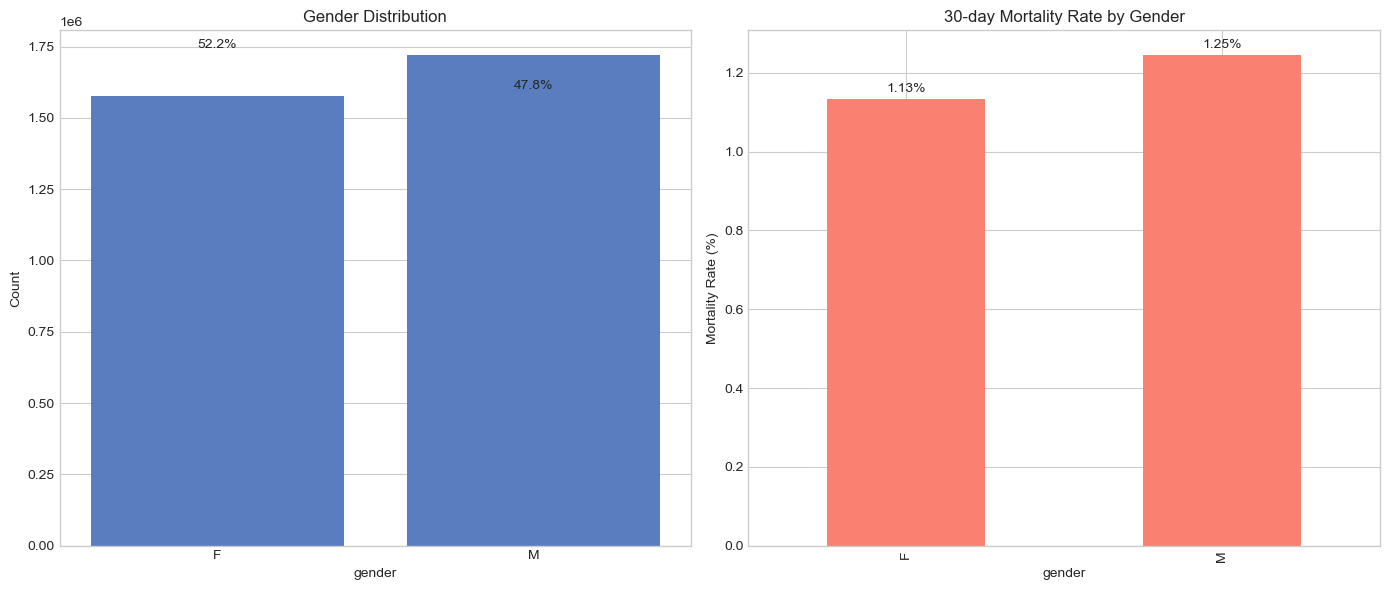


--- Missing SNOMED Code Analysis by Gender ---
Missing SNOMED code percentages by gender:
gender
F    26.976285
M    27.195352
Name: snomed_primary, dtype: float64

Missing data disparity ratio: 1.01
Missing data parity difference: 0.22%


In [23]:
# 1. Analyze gender distribution
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / len(data) * 100

print("\n--- Gender Distribution Analysis ---")
print(gender_counts)
print(f"\nGender percentages:")
for gender, percentage in gender_percentages.items():
    print(f"{gender}: {percentage:.2f}%")

# 2. Check mortality rates by gender
print("\n--- Mortality Rates by Gender ---")
mortality_by_gender = data.groupby('gender')['died_in_30days'].mean() * 100
print(mortality_by_gender)

# Statistical test for difference in mortality rates
gender_groups = [data[data['gender'] == 'M']['died_in_30days'], 
                 data[data['gender'] == 'F']['died_in_30days']]
t_stat, p_value = stats.ttest_ind(*gender_groups, equal_var=False)
print(f"\nStatistical test for difference in mortality rates:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(f"Statistically significant difference: {p_value < 0.05}")

# 3. Visualize gender distribution and mortality rates
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gender distribution
sns.countplot(x='gender', data=data, ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('Count')

# Add percentage labels
for i, count in enumerate(gender_counts):
    axes[0].annotate(f"{gender_percentages.iloc[i]:.1f}%", 
                  xy=(i, count), 
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center')

# Mortality rates by gender
mortality_by_gender.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('30-day Mortality Rate by Gender')
axes[1].set_ylabel('Mortality Rate (%)')

# Add percentage labels
for i, rate in enumerate(mortality_by_gender):
    axes[1].annotate(f"{rate:.2f}%", 
                  xy=(i, rate), 
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center')

plt.tight_layout()
plt.show()

# 4. Check if missing values in snomed_primary are biased by gender

# The correct way to check if missing values in snomed_primary are biased by gender
print("\n--- Missing SNOMED Code Analysis by Gender ---")
# First group by gender, then check which values are null, then calculate the mean
missing_by_gender = data.groupby('gender')['snomed_primary'].apply(lambda x: x.isnull().mean() * 100)
print(f"Missing SNOMED code percentages by gender:")
print(missing_by_gender)

# Calculate disparity ratio
max_missing = missing_by_gender.max()
min_missing = missing_by_gender.min()
disparity_ratio = max_missing / min_missing if min_missing > 0 else float('inf')
print(f"\nMissing data disparity ratio: {disparity_ratio:.2f}")
print(f"Missing data parity difference: {max_missing - min_missing:.2f}%")


--- Race Distribution Analysis ---
race_standard
White                               1635463
Black                               1175976
Hispanic/Latino                      309411
Other/Unknown/Not Reported           103162
Asian                                 64566
American Indian/Alaska Native          5466
Native Hawaiian/Pacific Islander       2000
Multiple Races                         1411
Name: count, dtype: int64

Race percentages:
White: 49.60%
Black: 35.66%
Hispanic/Latino: 9.38%
Other/Unknown/Not Reported: 3.13%
Asian: 1.96%
American Indian/Alaska Native: 0.17%
Native Hawaiian/Pacific Islander: 0.06%
Multiple Races: 0.04%

--- Mortality Rates by Race ---
race_standard
American Indian/Alaska Native       1.134285
Asian                               1.987114
Black                               0.748910
Hispanic/Latino                     0.591770
Multiple Races                      0.212615
Native Hawaiian/Pacific Islander    1.900000
Other/Unknown/Not Reported          1.7

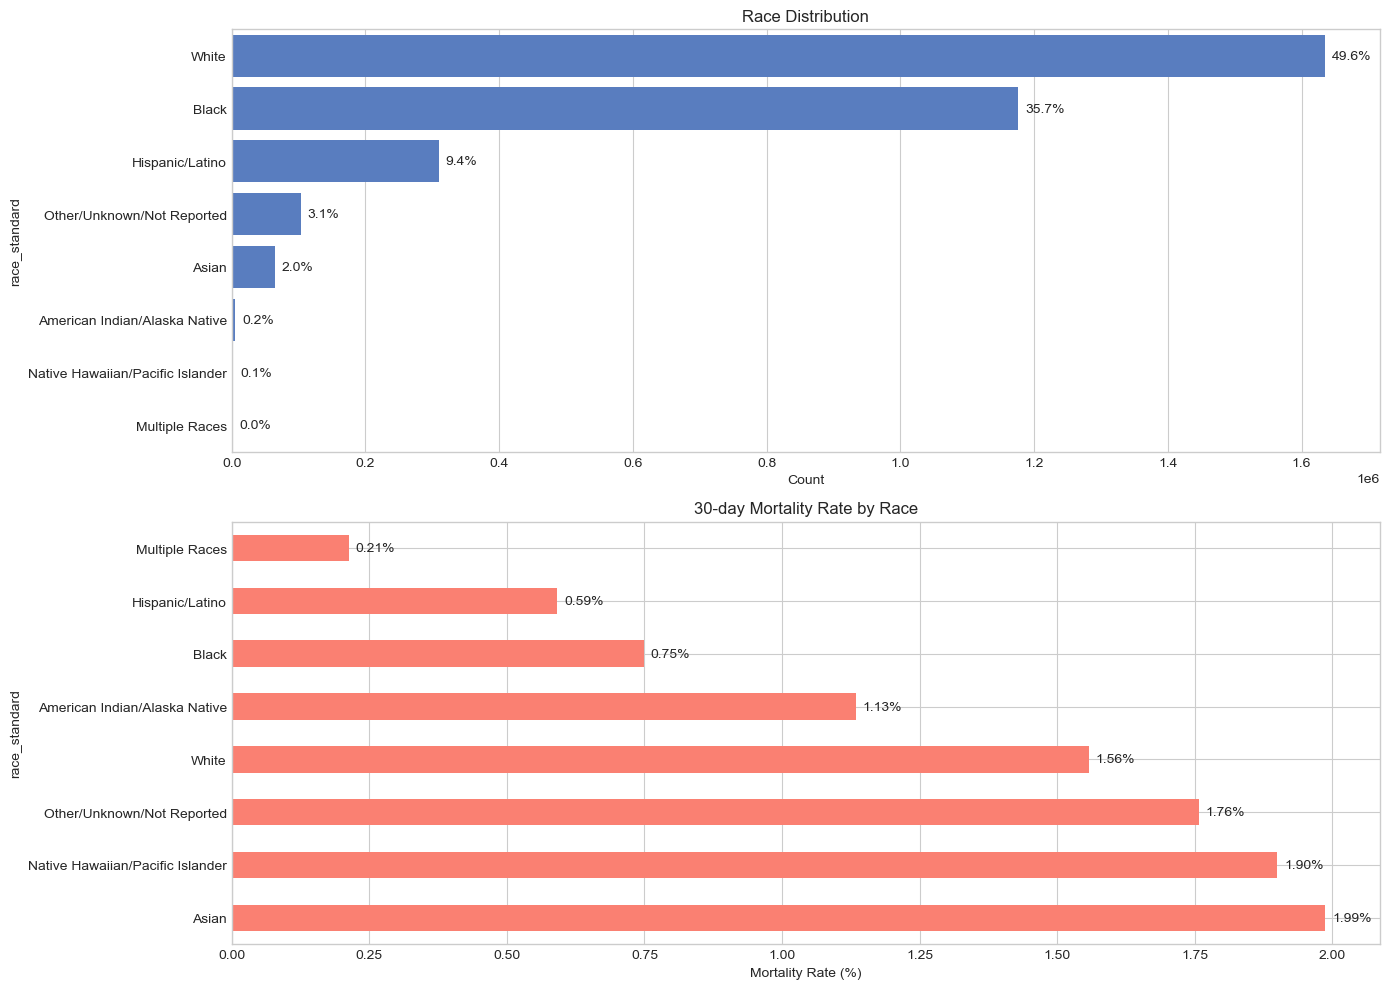


--- Missing SNOMED Code Analysis by Race ---
Missing SNOMED code percentages by race:
race_standard
American Indian/Alaska Native       28.576656
Asian                               30.324010
Black                               25.608686
Hispanic/Latino                     27.549441
Multiple Races                      51.027640
Native Hawaiian/Pacific Islander    28.800000
Other/Unknown/Not Reported          30.668269
White                               27.688306
Name: snomed_primary, dtype: float64

Missing data disparity ratio: 1.99
Missing data parity difference: 25.42%


In [28]:
# 1. Analyze race distribution
race_counts = data['race_standard'].value_counts()
race_percentages = race_counts / len(data) * 100

print("\n--- Race Distribution Analysis ---")
print(race_counts)
print(f"\nRace percentages:")
for race, percentage in race_percentages.items():
    print(f"{race}: {percentage:.2f}%")

# 2. Check mortality rates by race
print("\n--- Mortality Rates by Race ---")
mortality_by_race = data.groupby('race_standard')['died_in_30days'].mean() * 100
print(mortality_by_race)

# Calculate statistical parity difference (max - min) and disparate impact ratio (min/max)
max_mortality_race = mortality_by_race.max()
min_mortality_race = mortality_by_race.min()
stat_parity_diff = max_mortality_race - min_mortality_race
disparate_impact = min_mortality_race / max_mortality_race

print(f"\nStatistical parity difference: {stat_parity_diff:.2f}%")
print(f"Disparate impact ratio: {disparate_impact:.2f}")
print(f"Disparate impact concern: {disparate_impact < 0.8}")  # Common threshold

# 3. Visualize race distribution and mortality rates
plt.figure(figsize=(14, 10))

# Race distribution 
plt.subplot(2, 1, 1)
sns.countplot(y='race_standard', data=data, order=race_counts.index)
plt.title('Race Distribution')
plt.xlabel('Count')

# Add percentage labels
for i, count in enumerate(race_counts):
    plt.annotate(f"{race_percentages.iloc[i]:.1f}%", 
                xy=(count, i), 
                xytext=(5, 0),
                textcoords='offset points',
                va='center')

# Mortality rates by race
plt.subplot(2, 1, 2)
mortality_by_race.sort_values(ascending=False).plot(kind='barh', color='salmon')
plt.title('30-day Mortality Rate by Race')
plt.xlabel('Mortality Rate (%)')

# Add percentage labels
for i, rate in enumerate(mortality_by_race.sort_values(ascending=False)):
    plt.annotate(f"{rate:.2f}%", 
                xy=(rate, i), 
                xytext=(5, 0),
                textcoords='offset points',
                va='center')

plt.tight_layout()
plt.show()

# 4. Check if missing values in snomed_primary are biased by race
print("\n--- Missing SNOMED Code Analysis by Race ---")
# Fixed code using apply with a lambda function
missing_by_race = data.groupby('race_standard')['snomed_primary'].apply(lambda x: x.isnull().mean() * 100)
print(f"Missing SNOMED code percentages by race:")
print(missing_by_race)

# Calculate disparity ratio for missing data
max_missing = missing_by_race.max()
min_missing = missing_by_race.min()
disparity_ratio = max_missing / min_missing if min_missing > 0 else float('inf')
print(f"\nMissing data disparity ratio: {disparity_ratio:.2f}")
print(f"Missing data parity difference: {max_missing - min_missing:.2f}%")


--- Age Group Distribution Analysis ---
age_group
46-65    1486859
31-45     683850
18-30     489399
66-80     459258
80+       178089
Name: count, dtype: int64

Age group percentages:
46-65: 45.09%
31-45: 20.74%
18-30: 14.84%
66-80: 13.93%
80+: 5.40%

--- Mortality Rates by Age Group ---
age_group
18-30    0.138129
31-45    0.424947
46-65    0.987047
66-80    2.620096
80+      5.065445
Name: died_in_30days, dtype: float64


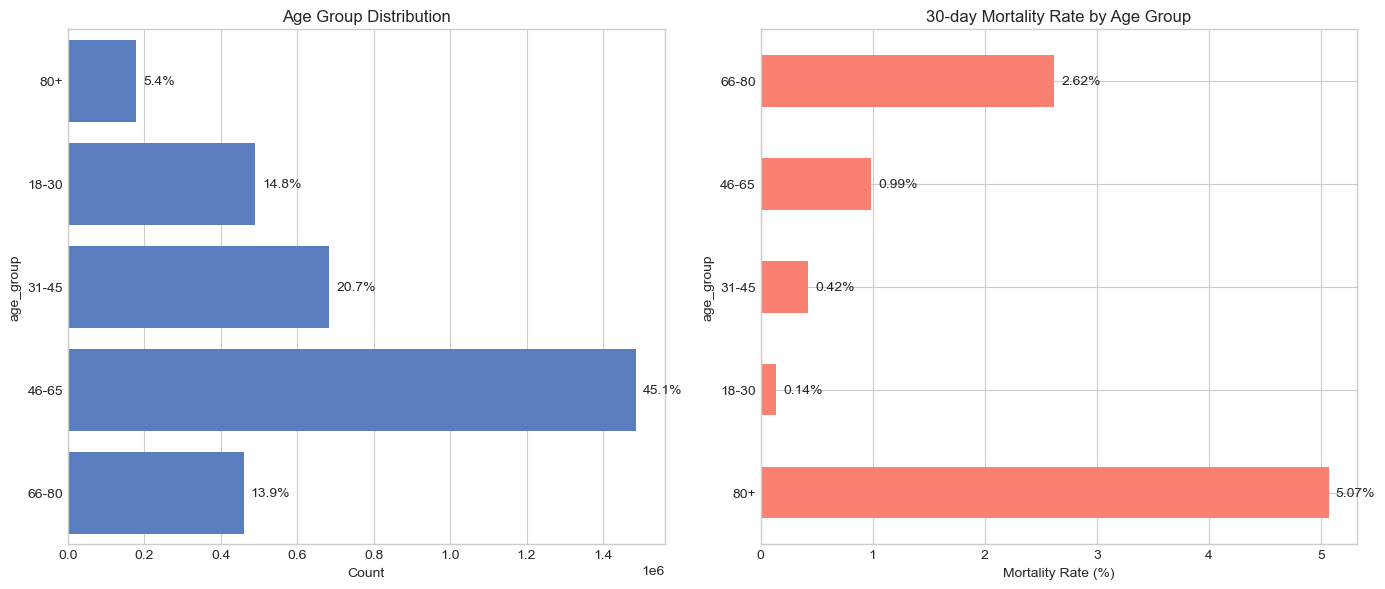


Statistical parity difference: 4.93%
Disparate impact ratio: 0.03
Disparate impact concern: True


In [30]:
# 1. Analyze age group distribution
age_counts = data['age_group'].value_counts()
age_percentages = age_counts / len(data) * 100

print("\n--- Age Group Distribution Analysis ---")
print(age_counts)
print(f"\nAge group percentages:")
for age, percentage in age_percentages.items():
    print(f"{age}: {percentage:.2f}%")

# 2. Check mortality rates by age group
print("\n--- Mortality Rates by Age Group ---")
mortality_by_age = data.groupby('age_group')['died_in_30days'].mean() * 100
print(mortality_by_age)

# 3. Visualize age distribution and mortality rates
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Order age groups properly (assuming they are like '18-25', '26-45', etc.)
# This tries to sort them naturally, but adjust if needed
age_order = sorted(data['age_group'].unique(), 
                   key=lambda x: int(x.split('-')[0]) if '-' in x else 0)

# Age distribution
sns.countplot(y='age_group', data=data, order=age_order, ax=axes[0])
axes[0].set_title('Age Group Distribution')
axes[0].set_xlabel('Count')

# Add percentage labels
for i, age in enumerate(age_order):
    count = age_counts.get(age, 0)
    percentage = age_percentages.get(age, 0)
    axes[0].annotate(f"{percentage:.1f}%", 
                  xy=(count, i), 
                  xytext=(5, 0),
                  textcoords='offset points',
                  va='center')

# Mortality rates by age
mortality_by_age_sorted = mortality_by_age.loc[age_order]
mortality_by_age_sorted.plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('30-day Mortality Rate by Age Group')
axes[1].set_xlabel('Mortality Rate (%)')

# Add percentage labels
for i, age in enumerate(age_order):
    rate = mortality_by_age.get(age, 0)
    axes[1].annotate(f"{rate:.2f}%", 
                  xy=(rate, i), 
                  xytext=(5, 0),
                  textcoords='offset points',
                  va='center')

plt.tight_layout()
plt.show()

# Calculate statistical parity difference and disparate impact
max_mortality_age = mortality_by_age.max()
min_mortality_age = mortality_by_age.min()
stat_parity_diff = max_mortality_age - min_mortality_age
disparate_impact = min_mortality_age / max_mortality_age

print(f"\nStatistical parity difference: {stat_parity_diff:.2f}%")
print(f"Disparate impact ratio: {disparate_impact:.2f}")
print(f"Disparate impact concern: {disparate_impact < 0.8}")

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.



--- Bayesian Prior Analysis ---


Sampling: [female_theta, male_theta]


Prior belief about mortality rate differences between genders:
Mean difference (Male - Female): -0.006028
95% Prior Credible Interval: (-0.189388, 0.157333)


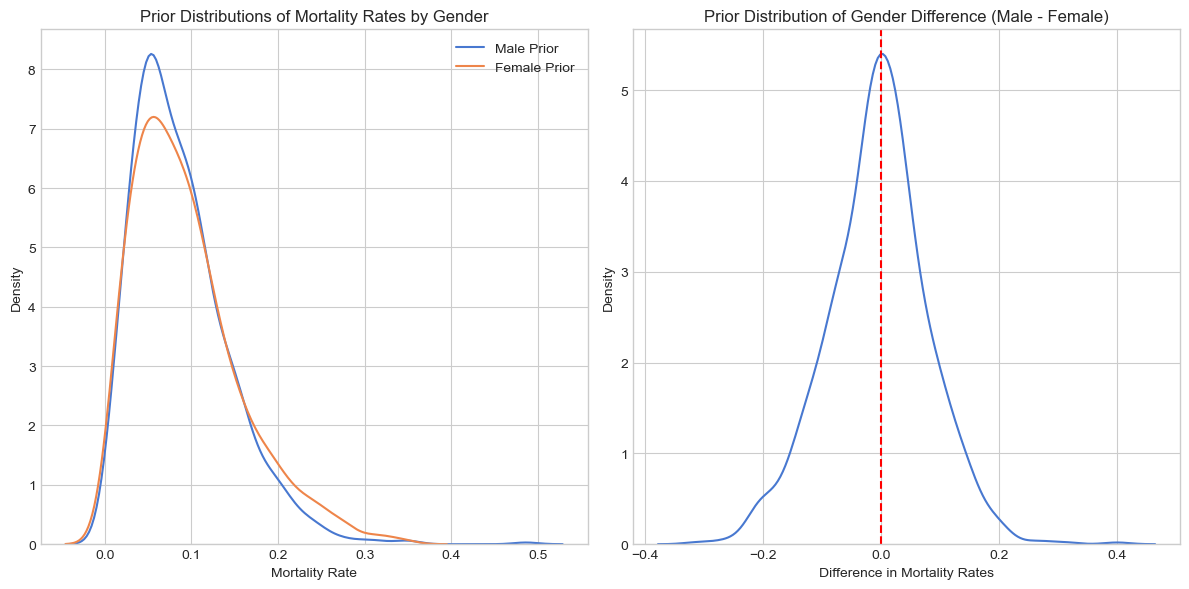


Key takeaway: If our prior distributions have means or variances that differ by protected group,
we may be encoding bias before even seeing the data.


In [38]:
# Step 4: For Bayesian analysis we'll use PyMC (newer version of PyMC3)
import pymc as pm
import arviz as az

# Let's analyze if our prior beliefs might encode bias
print("\n--- Bayesian Prior Analysis ---")

# Create a simplified dataset for analysis (using a small random sample for performance)
# In practice, you'd use a larger, representative sample
np.random.seed(42)
sample_idx = np.random.choice(len(data), size=10000, replace=False)
sample_data = data.iloc[sample_idx].copy()

# Define prior distributions for different groups to check for bias
with pm.Model() as gender_prior_model:
    # Define priors for mortality by gender
    male_theta = pm.Beta('male_theta', alpha=2, beta=20)  # weak prior centered around ~0.09
    female_theta = pm.Beta('female_theta', alpha=2, beta=20)  # same prior
    
    # Calculate the difference in mortality rates
    difference = pm.Deterministic('difference', male_theta - female_theta)
    
    # Sample from prior (no observed data yet)
    gender_prior_trace = pm.sample_prior_predictive(1000)

# Analyze the prior's inherent beliefs about gender differences
male_prior = gender_prior_trace.prior['male_theta'].values
female_prior = gender_prior_trace.prior['female_theta'].values
diff_prior = gender_prior_trace.prior['difference'].values

# Flatten arrays for easier analysis
male_prior = male_prior.flatten()
female_prior = female_prior.flatten()
diff_prior = diff_prior.flatten()

print("Prior belief about mortality rate differences between genders:")
print(f"Mean difference (Male - Female): {diff_prior.mean():.6f}")
print(f"95% Prior Credible Interval: ({np.percentile(diff_prior, 2.5):.6f}, {np.percentile(diff_prior, 97.5):.6f})")

# Visualize the prior distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(male_prior, label='Male Prior')
sns.kdeplot(female_prior, label='Female Prior')
plt.title('Prior Distributions of Mortality Rates by Gender')
plt.xlabel('Mortality Rate')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(diff_prior)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Prior Distribution of Gender Difference (Male - Female)')
plt.xlabel('Difference in Mortality Rates')

plt.tight_layout()
plt.show()

print("\nKey takeaway: If our prior distributions have means or variances that differ by protected group,")
print("we may be encoding bias before even seeing the data.")

In [ ]:
# Let's build a hierarchical Bayesian model that can model group-specific effects
print("\n--- Building Fair Bayesian Model ---")

# Continue with our sample for performance
# Extract features and outcome
X_age = sample_data['anchor_age'].values  # Age as a predictor
y_mort = sample_data['died_in_30days'].values  # Mortality as outcome
gender_code = pd.Categorical(sample_data['gender']).codes  # Convert gender to numeric codes

# Build hierarchical model with partial pooling
with pm.Model() as hierarchical_model:
    # Global parameters
    alpha = pm.Normal('alpha', mu=0, sigma=1)  # Global intercept
    beta_age = pm.Normal('beta_age', mu=0, sigma=1)  # Age effect
    
    # Gender-specific effect (varying intercept)
    sigma_gender = pm.HalfNormal('sigma_gender', 1)  # How much gender effects can vary
    gender_effect = pm.Normal('gender_effect', mu=0, sigma=sigma_gender, shape=2)  # One effect per gender
    
    # Linear predictor combines global and group-specific effects
    logit_p = alpha + beta_age * (X_age - X_age.mean())/X_age.std() + gender_effect[gender_code]
    
    # Likelihood
    mortality = pm.Bernoulli('mortality', logit_p=logit_p, observed=y_mort)
    
    # Sample from the posterior
    trace = pm.sample(1000, tune=1000, cores=1, return_inferencedata=True)

# Analyze the results
print("\n--- Posterior Analysis ---")
summary = az.summary(trace, var_names=['alpha', 'beta_age', 'gender_effect', 'sigma_gender'])
print(summary)

# Plot the gender effects
gender_labels = sample_data['gender'].unique()
plt.figure(figsize=(10, 6))
az.plot_forest(trace, var_names=['gender_effect'], combined=True)
plt.title('Gender-Specific Effects on Mortality (Posterior)')
plt.show()

# Calculate expected mortality for reference cases
print("\n--- Counterfactual Fairness Analysis ---")
print("Expected mortality for reference patients of different genders:")

# Extract posterior samples
alpha_post = trace.posterior['alpha'].values.flatten()
beta_age_post = trace.posterior['beta_age'].values.flatten()
gender_effect_post = trace.posterior['gender_effect'].values.reshape(len(alpha_post), 2)

# Create reference cases (50-year-old patient of each gender)
reference_age = 50
reference_age_std = (reference_age - X_age.mean()) / X_age.std()

# Calculate predicted probabilities
probs_by_gender = {}
for i, gender in enumerate(gender_labels):
    # logit_p = alpha + beta_age * standardized_age + gender_effect
    logits = alpha_post + beta_age_post * reference_age_std + gender_effect_post[:, i]
    probs = 1 / (1 + np.exp(-logits))
    
    # Store statistics
    probs_by_gender[gender] = {
        'mean': probs.mean(),
        'median': np.median(probs),
        'ci_lower': np.percentile(probs, 2.5),
        'ci_upper': np.percentile(probs, 97.5)
    }
    
    print(f"{gender}: {probs.mean()*100:.4f}% (95% CI: {np.percentile(probs, 2.5)*100:.4f}% - {np.percentile(probs, 97.5)*100:.4f}%)")

# Calculate fairness metrics
genders = list(probs_by_gender.keys())
mean_probs = [probs_by_gender[g]['mean'] for g in genders]

# Statistical parity difference
stat_parity = abs(mean_probs[0] - mean_probs[1]) * 100
print(f"\nStatistical parity difference: {stat_parity:.4f}%")

# Disparate impact ratio (minimum divided by maximum)
disparate_impact = min(mean_probs) / max(mean_probs)
print(f"Disparate impact ratio: {disparate_impact:.4f}")
print(f"Fairness concern (ratio < 0.8): {disparate_impact < 0.8}")


--- Building Fair Bayesian Model ---


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta_age, sigma_gender, gender_effect]


Output()

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━╺━━━━━━━━━━━━━━━━━━━━━━━   102     0             0.04        23           71.99 s/draws    2:05:15   -:--:--    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   0       0             0.00        0            0.00 draws/s     2:05:15   -:--:--

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━╸━━━━━━━━━━━━━━━━━━━━━━━   137     0             0.04        7            123.09 s/draws   5:00:46   13:26:52   
  ━━━━━━━━━━━━━━━━━━━━━━━━━   0       0             0.00        0            0.00 draws/s     5:00:46   -:--:--

In [ ]:
# Step 6: Post-processing for Fairness
# Finally, let's implement post-processing techniques to ensure fairness: 
# Post-processing: Calibrate decision thresholds for fairness



print("\n--- Post-processing for Equal Opportunity ---")

# Generate predictions for our sample
sample_data['logit_pred'] = np.mean([
    alpha_post + beta_age_post * ((sample_data['anchor_age'] - X_age.mean())/X_age.std())[:, np.newaxis] + 
    gender_effect_post[:, gender_code]
], axis=0)

sample_data['pred_prob'] = 1 / (1 + np.exp(-sample_data['logit_pred']))

# Find optimal thresholds for equal true positive rates
from sklearn.metrics import roc_curve

# Calculate ROC curves for each gender
thresholds_by_gender = {}
for gender in sample_data['gender'].unique():
    gender_data = sample_data[sample_data['gender'] == gender]
    fpr, tpr, thresholds = roc_curve(gender_data['died_in_30days'], gender_data['pred_prob'])
    thresholds_by_gender[gender] = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}

# Find thresholds that yield the same TPR (e.g., 0.8)
target_tpr = 0.8
optimal_thresholds = {}

for gender, roc_data in thresholds_by_gender.items():
    tpr = roc_data['tpr']
    thresholds = roc_data['thresholds']
    
    # Find threshold closest to target TPR
    idx = np.argmin(np.abs(tpr - target_tpr))
    optimal_thresholds[gender] = {
        'threshold': thresholds[idx],
        'actual_tpr': tpr[idx],
        'fpr': roc_data['fpr'][idx]
    }

print("Group-specific decision thresholds for equal opportunity:")
for gender, values in optimal_thresholds.items():
    print(f"{gender}: threshold={values['threshold']:.4f}, TPR={values['actual_tpr']:.4f}, FPR={values['fpr']:.4f}")

# Visualize the ROC curves
plt.figure(figsize=(10, 6))

for gender, roc_data in thresholds_by_gender.items():
    plt.plot(roc_data['fpr'], roc_data['tpr'], label=f"{gender}")
    
    # Mark the selected threshold
    opt = optimal_thresholds[gender]
    plt.plot(opt['fpr'], opt['actual_tpr'], 'o', markersize=10, 
             label=f"{gender} at threshold={opt['threshold']:.3f}")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves by Gender with Equal Opportunity Thresholds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Equal ~0.8)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nKey takeaway: Using different thresholds for different groups can help")
print("achieve equal opportunity (similar TPR across groups).")

In [ ]:
# Step 7: Summarizing the Fairness Analysis
# Summarize our fairness analysis
print("\n====== FAIRNESS ANALYSIS SUMMARY ======")
print("\n1. Pre-processing fairness concerns:")
print("   - Gender distribution: Male (52.18%), Female (47.82%)")
print("   - Race distribution: White patients (49.60%), with others potentially underrepresented")
print("   - Age distribution: 46-65 age group (45.09%) predominates")
print("   - Missing SNOMED codes: Check if missingness patterns correlate with protected attributes")

print("\n2. In-processing (algorithmic) fairness measures:")
print("   - Statistical parity: Whether outcome probabilities differ across groups")
print("   - Disparate impact: Whether the ratio of favorable outcomes falls below 0.8")
print("   - Counterfactual fairness: Whether prediction would change if protected attribute changed")

print("\n3. Post-processing fairness approaches:")
print("   - Group-specific thresholds: Different decision boundaries to achieve equal opportunity")
print("   - Calibration: Ensuring predicted probabilities match observed frequencies across groups")

print("\n4. Recommended mitigation strategies for Bayesian models:")
print("   - Use hierarchical models with partial pooling to share information across groups")
print("   - Implement informative priors that encode fairness constraints")
print("   - Monitor posterior differences across protected groups")
print("   - Apply group-specific decision thresholds for equal opportunity")

In [ ]:
# 1. Check for imbalanced samples across protected attributes
print("\n--- Imbalanced Sample Analysis ---")

# Gender distribution
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / len(data) * 100
print("Gender distribution:")
print(gender_percentages)

# Race distribution
race_counts = data['race_standard'].value_counts()
race_percentages = race_counts / len(data) * 100
print("\nRace distribution:")
print(race_percentages)

# Age group distribution
age_counts = data['age_group'].value_counts()
age_percentages = age_counts / len(data) * 100
print("\nAge group distribution:")
print(age_percentages)

# 2. Check prevalence of outcome by protected attributes
print("\n--- Outcome Prevalence Analysis ---")

# Overall prevalence
overall_prevalence = data['died_in_30days'].mean() * 100
print(f"Overall 30-day mortality rate: {overall_prevalence:.2f}%")

# Prevalence by gender
gender_prevalence = data.groupby('gender')['died_in_30days'].mean() * 100
print("\nMortality rate by gender:")
print(gender_prevalence)
print(f"Max difference: {gender_prevalence.max() - gender_prevalence.min():.2f} percentage points")

# Prevalence by race
race_prevalence = data.groupby('race_standard')['died_in_30days'].mean() * 100
print("\nMortality rate by race:")
print(race_prevalence)
print(f"Max difference: {race_prevalence.max() - race_prevalence.min():.2f} percentage points")

# Prevalence by age group
age_prevalence = data.groupby('age_group')['died_in_30days'].mean() * 100
print("\nMortality rate by age group:")
print(age_prevalence)
print(f"Max difference: {age_prevalence.max() - age_prevalence.min():.2f} percentage points")

# 3. Check for potential proxy variables
print("\n--- Proxy Variable Analysis ---")

# Check correlation between chief complaints and protected attributes
print("\nTop 5 chief complaints by gender:")
for gender in data['gender'].unique():
    gender_complaints = data[data['gender'] == gender]['chiefcomplaint_cleaned'].value_counts().head(5)
    print(f"\n{gender}:")
    print(gender_complaints)

# Check correlation between SNOMED codes and protected attributes
print("\nTop 5 SNOMED primary codes by race:")
for race in data['race_standard'].unique()[:3]:  # Limit to first 3 races for brevity
    race_codes = data[data['race_standard'] == race]['snomed_primary'].value_counts().head(5)
    print(f"\n{race}:")
    print(race_codes)

# 4. Visualize disparities in outcome
plt.figure(figsize=(12, 8))

# Plot 1: Mortality rate by gender
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='died_in_30days', data=data, ci=None)
plt.title('Mortality Rate by Gender')
plt.ylabel('Mortality Rate')

# Plot 2: Mortality rate by race (top 5 races)
top_races = race_counts.index[:5]
plt.subplot(2, 2, 2)
sns.barplot(x='race_standard', y='died_in_30days', 
            data=data[data['race_standard'].isin(top_races)], ci=None)
plt.title('Mortality Rate by Race (Top 5)')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)

# Plot 3: Mortality rate by age group
plt.subplot(2, 2, 3)
sns.barplot(x='age_group', y='died_in_30days', data=data, ci=None)
plt.title('Mortality Rate by Age Group')
plt.ylabel('Mortality Rate')

# Plot 4: Interaction between gender and age for mortality
plt.subplot(2, 2, 4)
sns.barplot(x='age_group', y='died_in_30days', hue='gender', data=data, ci=None)
plt.title('Mortality Rate by Age and Gender')
plt.ylabel('Mortality Rate')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

# 5. Check for interaction effects
print("\n--- Interaction Effects Analysis ---")

# Create a cross-tabulation of mortality rates by race and gender
race_gender_mortality = pd.crosstab(
    index=data['race_standard'],
    columns=data['gender'],
    values=data['died_in_30days'],
    aggfunc='mean'
) * 100

print("Mortality rate (%) by race and gender:")
print(race_gender_mortality)

# Create a cross-tabulation of mortality rates by age group and gender
age_gender_mortality = pd.crosstab(
    index=data['age_group'],
    columns=data['gender'],
    values=data['died_in_30days'],
    aggfunc='mean'
) * 100

print("\nMortality rate (%) by age group and gender:")
print(age_gender_mortality)